In [8]:
import glob
root = '/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/'
countFiles = glob.glob(root + '*')
countFiles

['/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/R4A_inputB_counts-output-fitxer.order.txt',
 '/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/R4B_inputB_counts-output-fitxer.order.txt',
 '/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/R4B_inputB_corrected-sequences.order.txt',
 '/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/R4A_inputA_counts-output-fitxer.order.txt',
 '/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/R4B_inputA_corrected-sequences.order.txt',
 '/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/R4A_inputA_corrected-sequences.order.txt',
 '/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/R4B_inputA_counts-output-fitxer.order.txt',
 '/mnt/storage/projects/k-seq/input/bfo_counts/galaxy_extraction_correction/R4A_inputB_corrected-sequences.order.txt']

In [15]:
import numpy as np
import pandas as pd

def import_count_file(sampleDirc):
    sample = {}
    with open(sampleDirc, 'r') as file:
        sample['uniqueSeq'] = int([elem for elem in next(file).strip().split()][-1])
        sample['totalSeq'] = int([elem for elem in next(file).strip().split()][-1])
        next(file)
        sample['seqs'] = {}
        for line in file:
            seq = line.strip().split()
            sample['seqs'][seq[0]] = int(seq[1])
    return sample


countTable = {}
for expRep in ['A', 'B']:
    for seqRep in ['A', 'B']:
        sample = import_count_file(root+'R4{}_input{}_counts-output-fitxer.order.txt'.format(expRep, seqRep))
        df1 = pd.DataFrame(index=sample['seqs'].keys(), data=list(sample['seqs'].values()), columns=['original'])
        sample = import_count_file(root+'R4{}_input{}_corrected-sequences.order.txt'.format(expRep, seqRep))
        df2 = pd.DataFrame(index=sample['seqs'].keys(), data=list(sample['seqs'].values()), columns=['corrected'])
        df = pd.concat([df1, df2], axis=1)
        countTable['R4{}_input{}'.format(expRep, seqRep)] = df

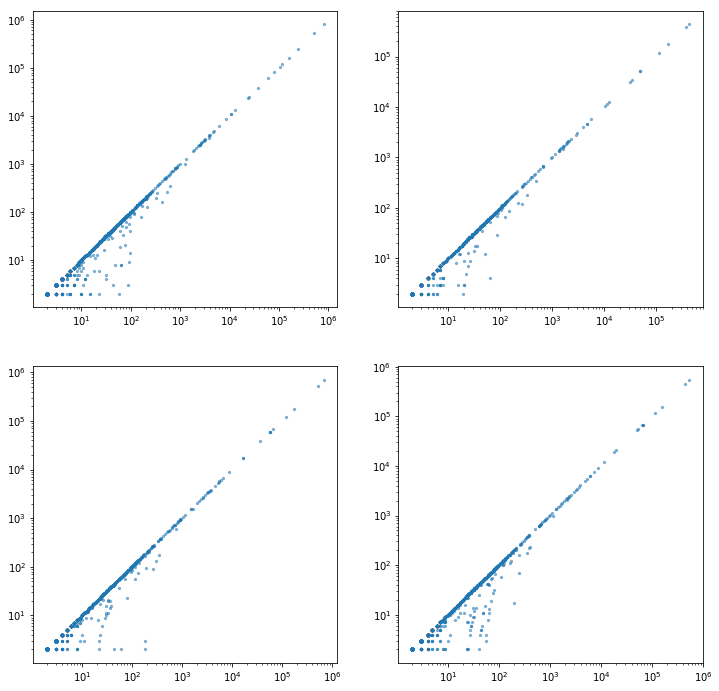

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2,figsize=[12,12])

for ix,sample in enumerate(countTable.keys()):
    df = countTable[sample][countTable[sample]['original']>1]
    ax = axes[int(ix / 2), ix % 2]
    ax.scatter(df['original'], df['corrected'], s=5, alpha=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
plt.show()

In [55]:
import Levenshtein
spikeIn = 'CTACTTCAAACAATCGGTCTG'

df[[Levenshtein.distance(seq, spikeIn)<=3 for seq in df.index]]

,original,corrected
ACACTTCAAACAATCGGTCTG,3,3
ACCCACTTCAAACAATCGGTCTG,795,814
ACCTACTTCAAACAATCGGTCTG,6,6
ACTGCCTTCAAACAATCGGTCTG,5,5
ACTTCAAACAATCGGTCTG,25,25
ATACTTCAAACAATCGGTCTG,77,77
ATACTTCAAACAATCGGTCTTC,2,2
ATCTTCAAACAATCGGTCTGC,2,2
ATGCTTCAAACAATCGGTGTG,6,2
CAACTTCAAACAATCGGTCTG,89,89


In [53]:
Levenshtein.distance('CTACTTCAAACAATCGGTCTG', 'ATTACCCTGGTCATCGAGTGA')

13